In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define base path
base_dir = Path("C:/Users/archa/Desktop/Databricks/Data")
staging_path = base_dir / "processed/staging/claims_staging.csv"
gold_path = base_dir / "processed/gold/claims_cleaned.csv"

In [3]:
# Load staging claims data
df = pd.read_csv(staging_path)
df.head()

,DATE,AMOUNT,COMPANY,ACCIDENT_STATE,CLAIM_ID,ERROR_REASON
0,2023-01-01,489.0,Blue Cross,NY,NaN,NaN
1,2023-01-02,544.0,Kaiser,TX,NaN,NaN
2,2023-01-03,404.0,Blue Cross,TX,NaN,NaN
3,2023-01-04,615.0,Kaiser,NY,NaN,NaN
4,2023-01-05,580.0,United,CA,NaN,NaN


In [4]:
# Group by COMPANY and ACCIDENT_STATE, sum AMOUNT
agg_df = df.groupby(['COMPANY', 'ACCIDENT_STATE'], as_index=False)['AMOUNT'].sum()
agg_df.rename(columns={"AMOUNT": "TOTAL_CLAIMED_AMOUNT"}, inplace=True)

# Save to Gold Layer
agg_df.to_csv(gold_path, index=False)
print("✅ Aggregated and saved to Gold Layer.")


✅ Aggregated and saved to Gold Layer.


C:\Users\archa\AppData\Local\Temp\ipykernel_2512\2020343221.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="Blues_d")


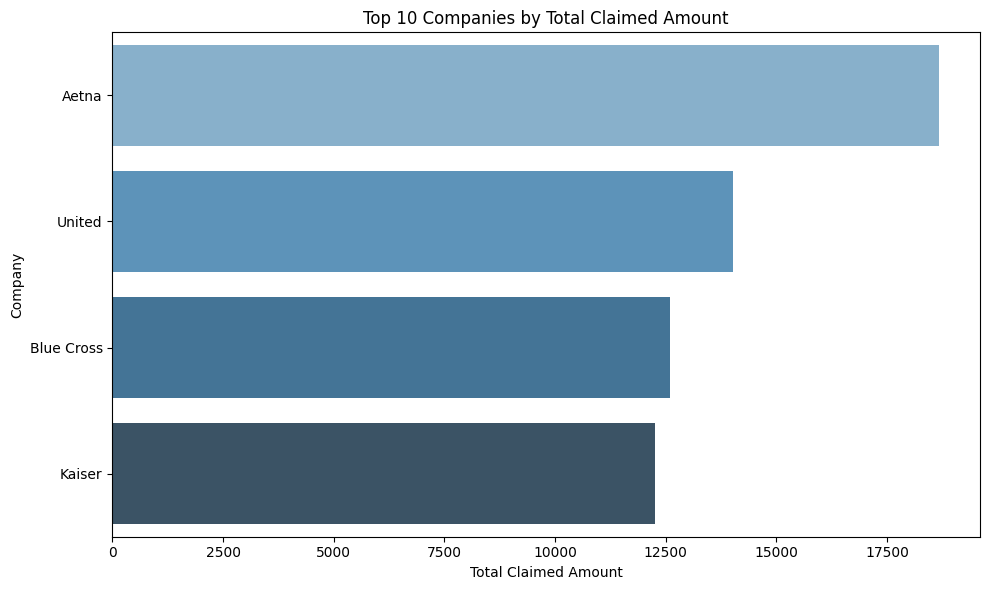

In [7]:
# Load Gold Layer
gold_df = pd.read_csv(gold_path)

# Plot: Top 10 Companies by Claim Amount
top_companies = (
    gold_df.groupby("COMPANY")["TOTAL_CLAIMED_AMOUNT"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="Blues_d")
plt.title("Top 10 Companies by Total Claimed Amount")
plt.xlabel("Total Claimed Amount")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

In [8]:
print("📊 Total Records in Gold Layer:", len(gold_df))
print("💰 Total Claimed Amount:", gold_df['TOTAL_CLAIMED_AMOUNT'].sum())
print("📍 Unique States:", gold_df['ACCIDENT_STATE'].nunique())


📊 Total Records in Gold Layer: 16
💰 Total Claimed Amount: 57556.0
📍 Unique States: 4


In [12]:
staging_df = pd.read_csv("C:/Users/archa/Desktop/Databricks/Data/processed/staging/claims_staging.csv")
print("📅 Staging Columns:", staging_df.columns.tolist())


📅 Staging Columns: ['DATE', 'AMOUNT', 'COMPANY', 'ACCIDENT_STATE', 'CLAIM_ID', 'ERROR_REASON']


In [11]:
# Load gold layer
df = pd.read_csv("C:/Users/archa/Desktop/Databricks/Data/processed/gold/claims_cleaned.csv")
print("🔍 Columns in gold layer:", df.columns.tolist())

🔍 Columns in gold layer: ['COMPANY', 'ACCIDENT_STATE', 'TOTAL_CLAIMED_AMOUNT']


C:\Users\archa\AppData\Local\Temp\ipykernel_2512\4073921766.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ACCIDENT_STATE", y="TOTAL_CLAIMED_AMOUNT", data=state_totals, palette="viridis")
C:\Users\archa\AppData\Local\Temp\ipykernel_2512\4073921766.py:15: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from current font.
  plt.tight_layout()
c:\Users\archa\Desktop\Databricks\Claims_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


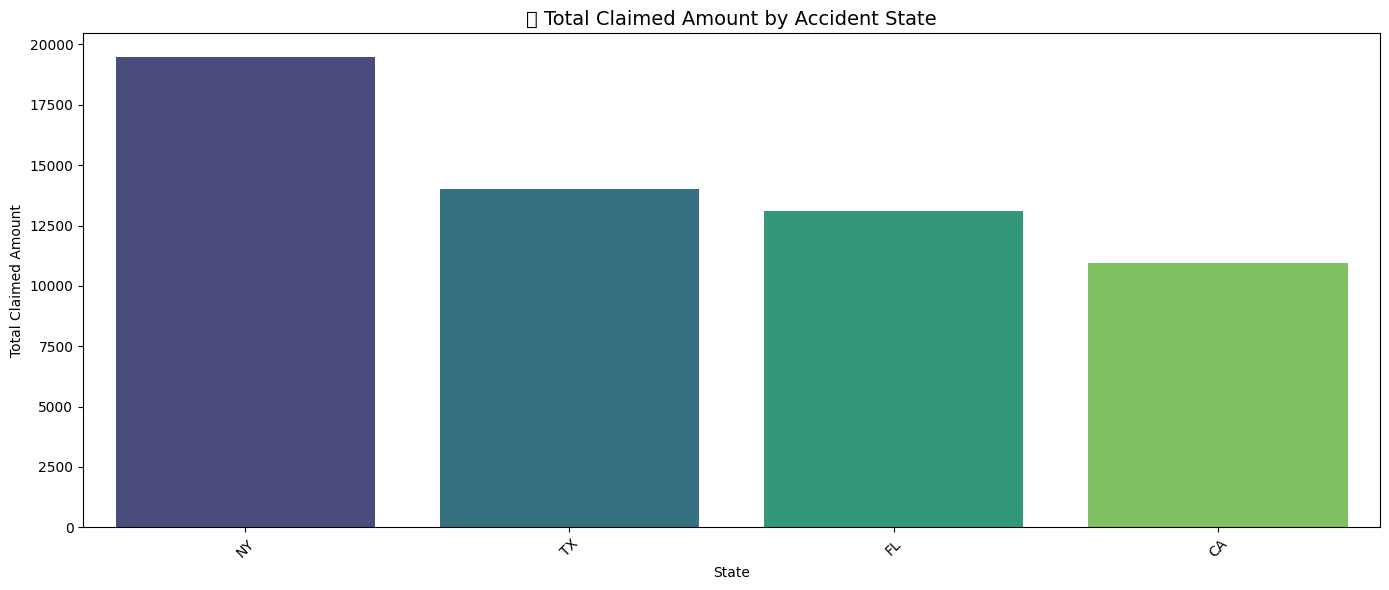

In [13]:
# Aggregate
state_totals = df.groupby("ACCIDENT_STATE")["TOTAL_CLAIMED_AMOUNT"].sum().reset_index()

# Sort for clarity
state_totals = state_totals.sort_values(by="TOTAL_CLAIMED_AMOUNT", ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x="ACCIDENT_STATE", y="TOTAL_CLAIMED_AMOUNT", data=state_totals, palette="viridis")

plt.title("🗺️ Total Claimed Amount by Accident State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Total Claimed Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
import plotly.express as px

fig = px.choropleth(
    state_totals,
    locations="ACCIDENT_STATE",
    locationmode="USA-states",
    color="TOTAL_CLAIMED_AMOUNT",
    scope="usa",
    color_continuous_scale="Reds",
    title="🗺️ Claims Heatmap by State"
)
fig.show()
